In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\johnk\customer churn prediction\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.replace({
    'gender': {'Male': 1, 'Female': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Churn': {'Yes': 1, 'No': 0},
    'Dependents' : {'Yes': 1, 'No': 0},
    'PhoneService' : {'Yes': 1, 'No': 0},
    'MultipleLines' : {'Yes': 1 , 'No': 0 , 'No phone service': 0},
    'OnlineSecurity' : {'Yes': 1, 'No': 0},
    'OnlineBackup' : {'Yes': 1, 'No': 0},
    'DeviceProtection' : {'Yes': 1, 'No': 0},
    'TechSupport' : {'Yes': 1, 'No': 0},
    'StreamingTV' : {'Yes': 1, 'No': 0},
    'StreamingMovies' : {'Yes': 1, 'No': 0},
    'PaperlessBilling' : {'Yes': 1, 'No': 0},
}, inplace=True)


C:\Users\johnk\AppData\Local\Temp\ipykernel_39648\2395885567.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [9]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.592219,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,1.000000


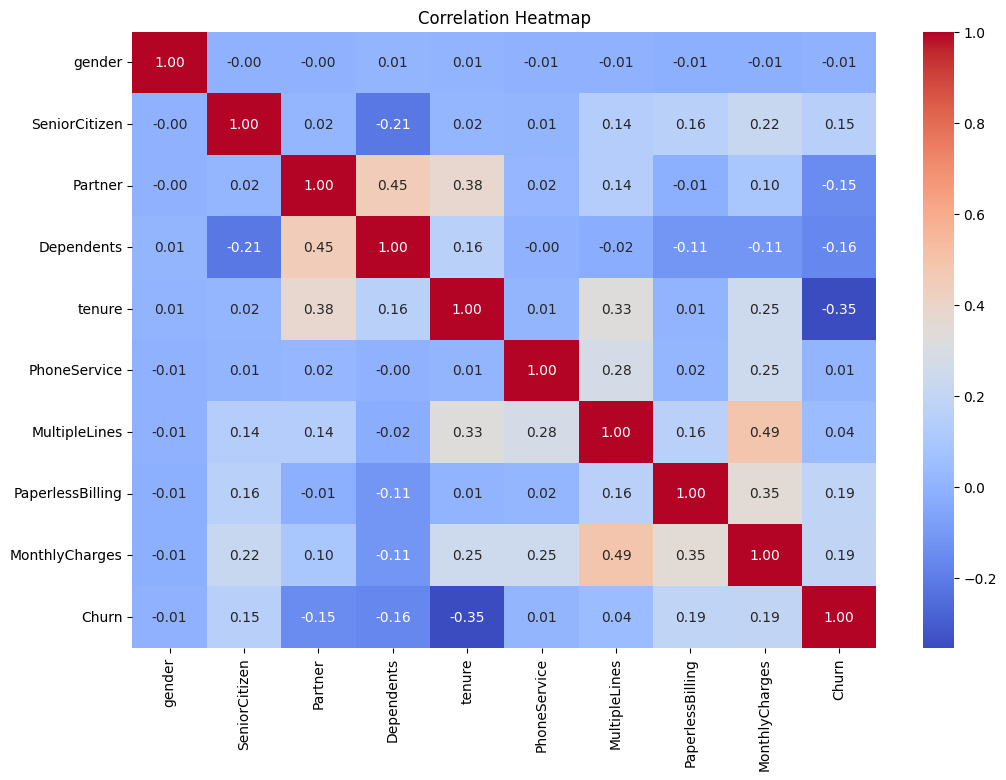

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include='number').corr()

# Compute the correlation matrix
#correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


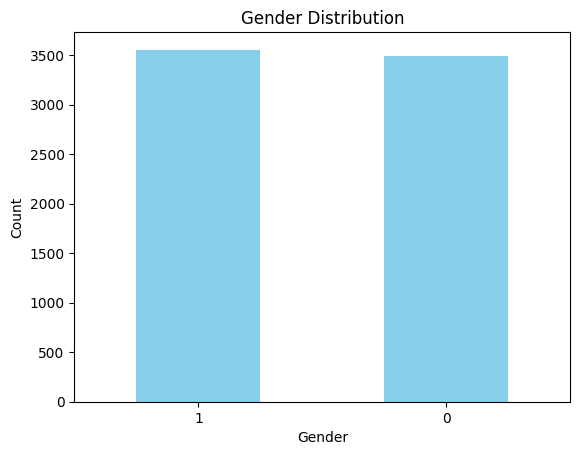

In [11]:
df['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


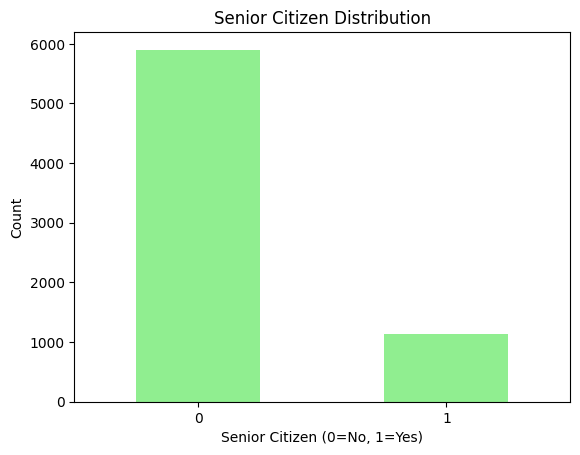

In [12]:
df['SeniorCitizen'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


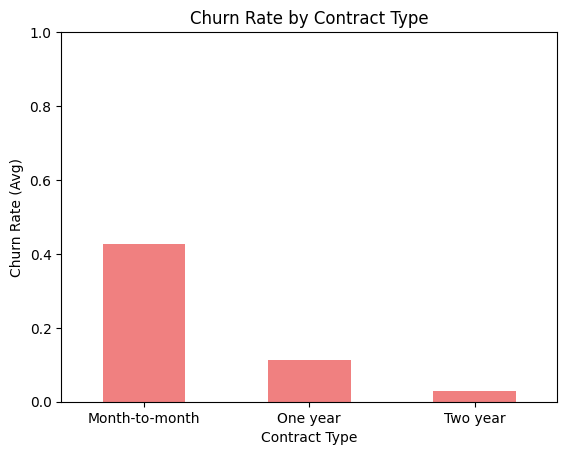

In [13]:
df.groupby('Contract')['Churn'].mean().plot(kind='bar', color='lightcoral')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (Avg)')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


In [14]:
# Perform One-Hot Encoding for remaining categorical columns
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,False,True,False,False,False,False,True,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,True,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,True,False,False,False,False,True,False,False,True,False


In [15]:
# Drop the "customerID" column from the DataFrame
df.drop("customerID", axis=1, inplace=True)

In [16]:
df.columns = df.columns.str.strip()
df.replace({
    'InternetService_Fiber optic': {False: 0, True: 1},
    'InternetService_No': {False: 0, True: 1},
    'InternetService_DSL': {False: 0, True: 1},
    'PaymentMethod_Mailed check': {False: 0, True: 1},
    'PaymentMethod_Electronic check': {False: 0, True: 1},
    'PaymentMethod_Credit card (automatic)': {False: 0, True: 1},
    'PaymentMethod_Bank transfer (automatic)': {False: 0, True: 1},
    'Contract_Two year': {False: 0, True: 1},
    'Contract_One year': {False: 0, True: 1},
    'Contract_Month-to-month': {False: 0, True: 1},
    'MultipleLines_No': {False: 0, True: 1},
    'MultipleLines_Yes': {False: 0, True: 1},
    'MultipleLines_No phone service': {False: 0, True: 1}

}, inplace=True)
print(df.dtypes)


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year              

C:\Users\johnk\AppData\Local\Temp\ipykernel_39648\2209400477.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


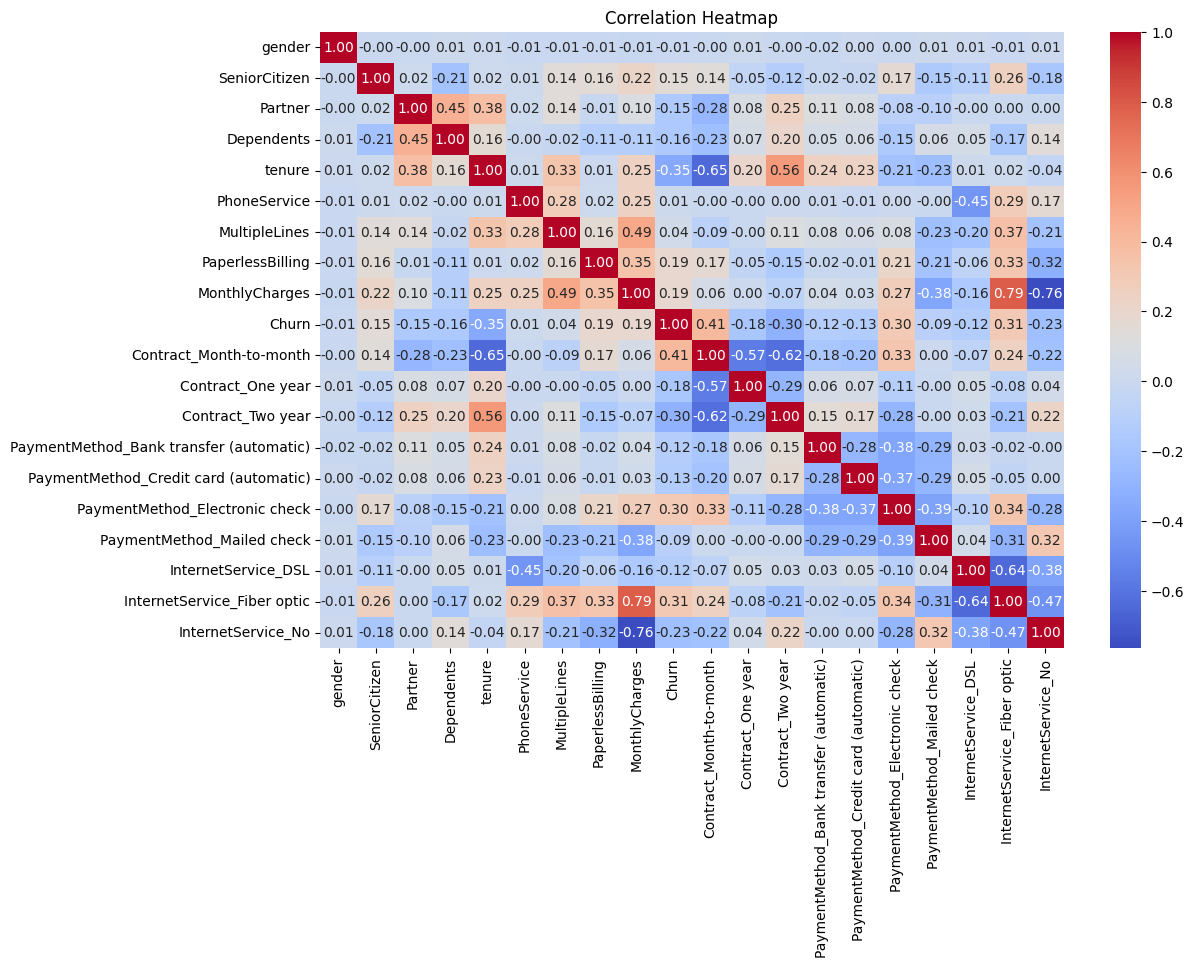

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include='number').corr()

# Compute the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
cols_to_convert = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Step 1: Convert all values to lowercase strings and strip whitespace
df[cols_to_convert] = df[cols_to_convert].apply(lambda col: col.astype(str).str.lower().str.strip())

# Step 2: Replace values
df[cols_to_convert] = df[cols_to_convert].replace({
    'no internet service': 0,
    'no': 0,
    'yes': 1
})


In [19]:
cols_to_convert = ['OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df[cols_to_convert] = df[cols_to_convert].astype(int)


In [20]:
df['IsLongTerm'] = df['tenure'].apply(lambda x: 1 if x >= 12 else 0)

In [21]:
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['NumServices'] = df[service_cols].sum(axis=1)


In [22]:
df['HighRiskPaymentMethod'] = df['PaymentMethod_Electronic check']


In [23]:
df['SeniorAlone'] = ((df['SeniorCitizen'] == 1) & (df['Partner'] == 'No') & (df['Dependents'] == 'No')).astype(int)


In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'IsLongTerm', 'NumServices',
       'HighRiskPaymentMethod', 'SeniorAlone'],
      dtype='object')

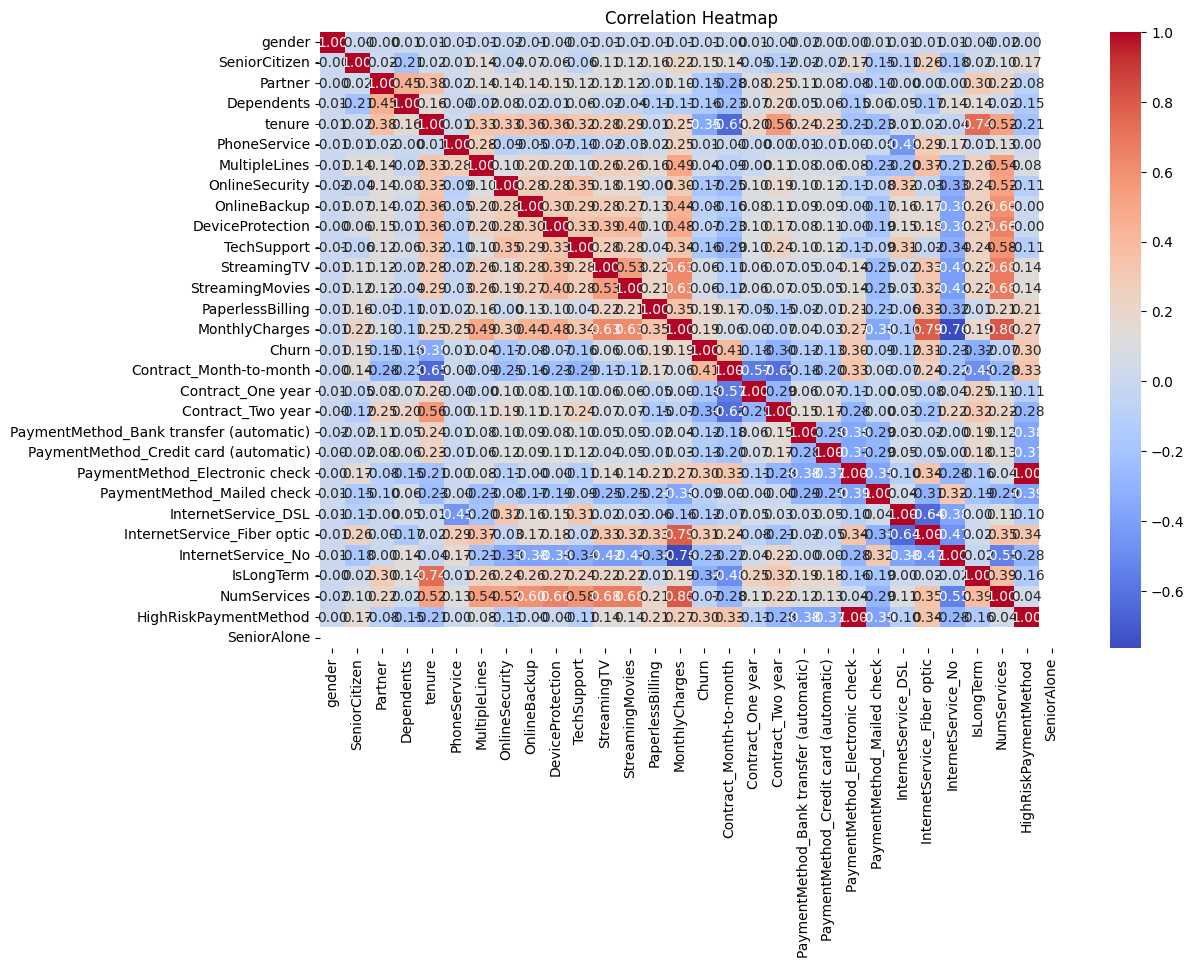

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include='number').corr()

# Compute the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [27]:
# Convert object data types to boolean
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('bool')

# Verify the changes
print(df.dtypes)

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year              

In [ ]:
df = df.dropna().reset_index(drop=True)


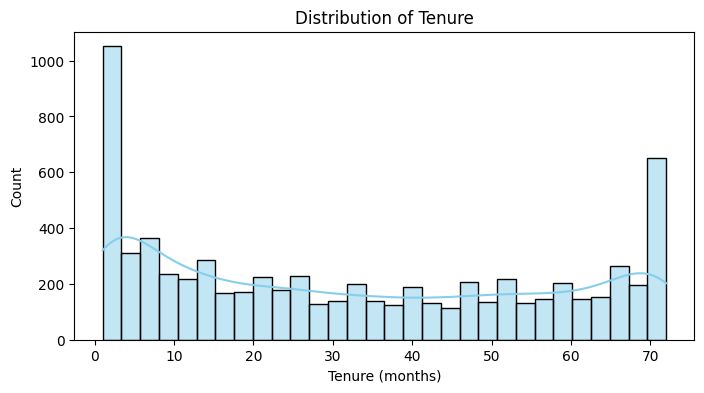

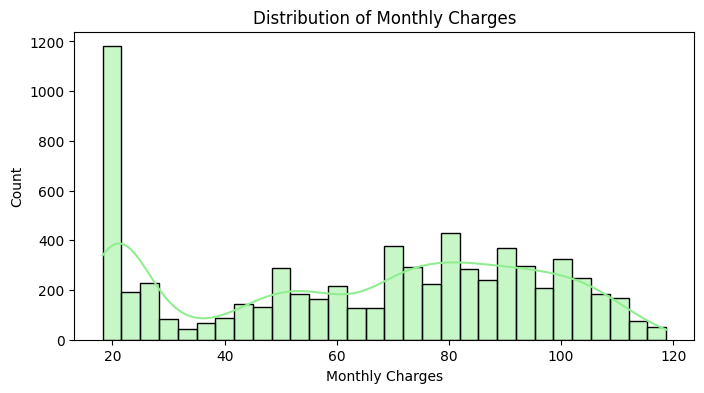

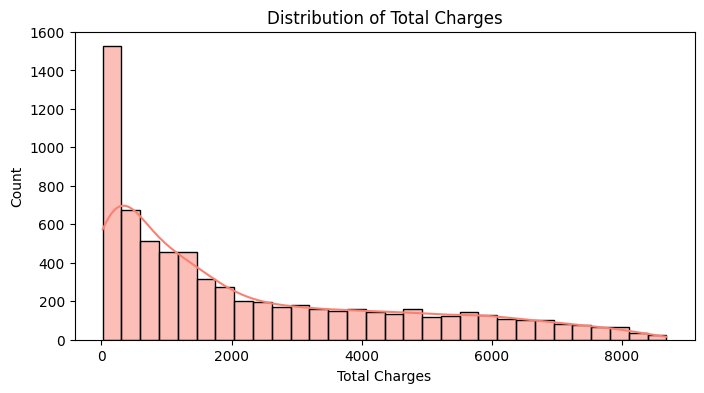

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tenure distribution
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

# MonthlyCharges distribution
plt.figure(figsize=(8,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# TotalCharges distribution
plt.figure(figsize=(8,4))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv(r"C:\Users\johnk\customer churn prediction\Data\processed_data.csv", index=False)